### Multiple linear regression

- one target with multiple features
- one dependent variable and multiple independent variables
- y = b0 + b1x1 + b2x2 + ....... + bnxn
- examples like price of house

### steps for using sklearn

1. Read the data
2. Cleaning / analyzing the data
3. Seperate the data for dependent(target) and independent(features) variables
4. Split the data for train or test
5. Select the requried model
6. Fit the training data
7. Predict the data using test data
8. Compare the actual and predicted data
9. Calculate the evalution metrics

In [1]:
import pandas as pd

In [2]:
### Read the data
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
## to check the null values
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
df['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [10]:
### Seperate the features and target values

x = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [29]:
### splitting the data into train and test

from sklearn.model_selection import train_test_split

### four variables to store values and test_size or train_size will store only those no of values as (0.3 means 30%)
### random_state = int val -> for one iteration it takes some random values from dataset everytime
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 25)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
733,15.4,11.0,13.4
671,15.1,10.3,12.9
344,24.1,19.2,21.9
675,12.7,9.1,11.1
200,9.5,6.5,8.2
948,9.6,7.1,8.5
346,24.9,19.6,22.5
634,18.0,12.8,15.7
859,17.9,12.8,15.6
478,21.5,14.6,18.4


In [30]:
x_test.shape

(321, 3)

In [31]:
### Select the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)   ## mathematical operation done here fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
### Predict the data -> testing the data by test data x_test is 

y_pred = model.predict(x_test)
y_pred

array([296.85976626, 366.46566403, 293.0023507 , 273.8648673 ,
       245.14634293, 268.60880516, 303.64351407, 223.08252727,
       219.65738279, 223.98236162, 276.48796756, 315.36939834,
       236.43388735, 221.5548416 , 184.62267389, 290.57483069,
       272.03394964, 198.07182409, 228.12245387, 265.78026304,
       237.95087933, 253.64266297, 190.78926405, 367.9933497 ,
       219.65738279, 276.82244851, 249.68745729, 267.23071387,
       199.37268054, 297.19424721, 367.9933497 , 274.19934824,
       229.65013954, 213.47023735, 195.73140052, 231.04878612,
       226.00885952, 329.84742197, 334.00806951, 353.54657503,
       229.86627508, 232.9774939 , 303.82840064, 318.05903977,
       258.08598721, 236.21775181, 242.12222055, 191.62255723,
       296.85976626, 214.25172628, 189.0766918 , 235.22012734,
       198.97165843, 252.04843614, 367.1806118 , 275.67522966,
       270.25483624, 237.36497065, 316.16158095, 240.75886617,
       319.70507085, 241.90608502, 147.54091179, 257.58

In [37]:
## to get only single predict value then we need to send test values 
### as many as features given
model.predict([[232.65810555,228.10416128,211.45555073]])

array([2713.47317219])

In [38]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [39]:
model.predict([[8.7,10.6,27]])

array([365.57692229])

In [47]:
## score represented how much accuracy did it worked is given
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_test,y_pred)*100   ## we given actual answers and predicted answers

79.7396580477286

In [49]:
mean_squared_error(y_test,y_pred)**0.5

28.44216546311447

In [50]:
model.intercept_

78.57272695721008

In [51]:
model.coef_

array([10.28873435, -8.99834343, 10.84720914])

### Polynomial Regression 

In [52]:
df1 = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv")

In [53]:
df1.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [54]:
df1.shape

(55, 2)

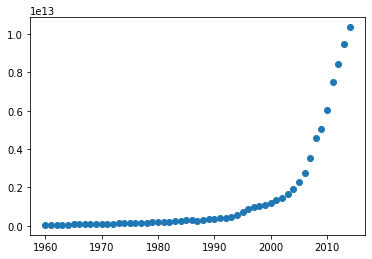

In [56]:
import matplotlib.pyplot as plt
plt.scatter(df1['Year'],df1['Value'])
plt.show()

In [59]:
x = df1['Year'].values.reshape(-1,1)
y = df1['Value'].values

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)   ## order we give here
x_poly = poly.fit_transform(x)      ## val should give 


In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly,y)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = model.predict(x_poly)
y_pred

array([-7.05978696e+11, -4.65669162e+11, -2.55990092e+11, -7.52860431e+10,
        7.80984243e+10,  2.05818757e+11,  3.09530392e+11,  3.90888773e+11,
        4.51549341e+11,  4.93167538e+11,  5.17398805e+11,  5.25898586e+11,
        5.20322320e+11,  5.02325448e+11,  4.73563416e+11,  4.35691663e+11,
        3.90365630e+11,  3.39240759e+11,  2.83972493e+11,  2.26216272e+11,
        1.67627540e+11,  1.09861736e+11,  5.45743027e+10,  3.42068224e+09,
       -4.19436836e+10, -7.98633533e+10, -1.08682886e+11, -1.26746839e+11,
       -1.32399770e+11, -1.23986238e+11, -9.98508042e+10, -5.83380219e+10,
        2.20754688e+09,  8.34413471e+10,  1.87018817e+11,  3.14595399e+11,
        4.67826538e+11,  6.48367672e+11,  8.57874244e+11,  1.09800169e+12,
        1.37040547e+12,  1.67674100e+12,  2.01866375e+12,  2.39782913e+12,
        2.81589261e+12,  3.27450961e+12,  3.77533559e+12,  4.32002598e+12,
        4.91023622e+12,  5.54762177e+12,  6.23383805e+12,  6.97054050e+12,
        7.75938459e+12,  

In [67]:
## score represented how much accuracy did it worked is given
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y,y_pred)*100   ## we given actual answers and predicted answers

96.45101047000898

In [68]:
mean_squared_error(y,y_pred)**0.5

466683670937.1865

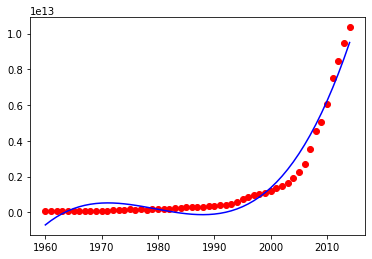

In [69]:
plt.scatter(df1['Year'],df1['Value'],c = 'red')
plt.plot(x,y_pred,c='Blue')
plt.show()

In [70]:
### to find accuracyof different degree values
## order 1 means -> linear 
acc = []
for i in range(2,20):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly,y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [71]:
acc

[84.24443474171446,
 96.45101047000898,
 96.5120230215125,
 96.57218086535269,
 96.63149021194226,
 96.68995728675763,
 96.74758835396048,
 96.80438971170584,
 96.86036769359764,
 96.9155286654676,
 96.96987902292203,
 97.02342519188323,
 97.07617362692899,
 97.12813080737529,
 97.17930323905428,
 97.22969745129517,
 97.27931999533536,
 97.32817744349673]

Text(0, 0.5, 'Accuracy')

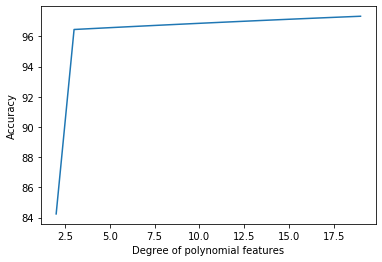

In [73]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel("Accuracy")
